In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [12]:
# Load your customer data into a pandas DataFrame
customer_data = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')

# Select relevant features for clustering (e.g., purchase amount and frequency)
X = customer_data[['UnitPrice', 'Quantity']]

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


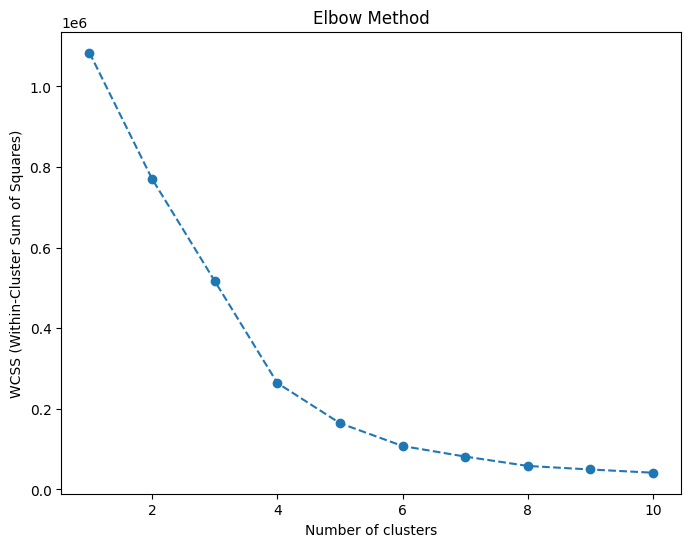

In [13]:
# Find the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


In [14]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)
customer_data['cluster'] = kmeans.labels_

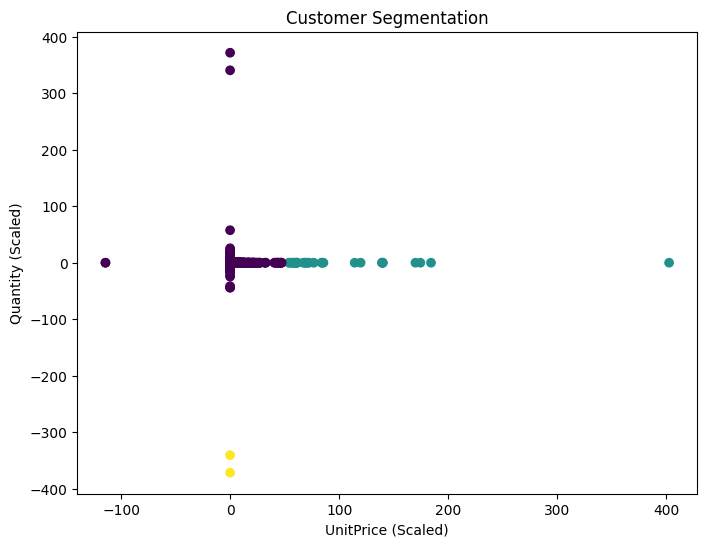

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=customer_data['cluster'], cmap='viridis')
plt.xlabel('UnitPrice (Scaled)')
plt.ylabel('Quantity (Scaled)')
plt.title('Customer Segmentation')
plt.show()

In [16]:
# Calculate the cluster means for purchase amount and frequency
cluster_means = customer_data.groupby('cluster')[['UnitPrice', 'Quantity']].mean()

# Calculate the number of customers in each cluster
cluster_sizes = customer_data['cluster'].value_counts().reset_index()
cluster_sizes.columns = ['cluster', 'num_customers']

# Combine cluster means and sizes into a single DataFrame
cluster_analysis = pd.merge(cluster_means, cluster_sizes, on='cluster')

# Display the cluster analysis
print(cluster_analysis)


   cluster    UnitPrice      Quantity  num_customers
0        0     4.054723      9.839308         541876
1        1  9730.436452     -0.806452             31
2        2     1.560000 -77605.000000              2
